# Лабораторная работа 4

### Задачи

- изучение инструментария Python для реализации алгоритмов метрической классификации;
- изучение методов оптимизации параметров метрической классификации;
- освоение модификаций kNN-метода.

### Вариант 12

#### Импорт данных

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data_path = "C:\\Users\\Mvideo\\mlda\\lab_04_12\\Employee.csv"
data = pd.read_csv(data_path)
data.head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


#### Вывод повторяющихся данных

In [4]:
data.duplicated().sum()

1889

Удаление дублирующихся данных

In [5]:
data.drop_duplicates(inplace = True)

In [6]:
data['ExperienceInCurrentDomain'].value_counts()

ExperienceInCurrentDomain
2    681
5    470
3    451
1    433
4    425
0    287
7      9
6      8
Name: count, dtype: int64

#### Распределение присоединившихся по годам

In [7]:
employees_joining_by_year = data.groupby(by = 'JoiningYear').size().reset_index(name = 'Employees Joined')
employees_joining_by_year

,JoiningYear,Employees Joined
0,2012,308
1,2013,396
2,2014,385
3,2015,464
4,2016,310
5,2017,662
6,2018,239


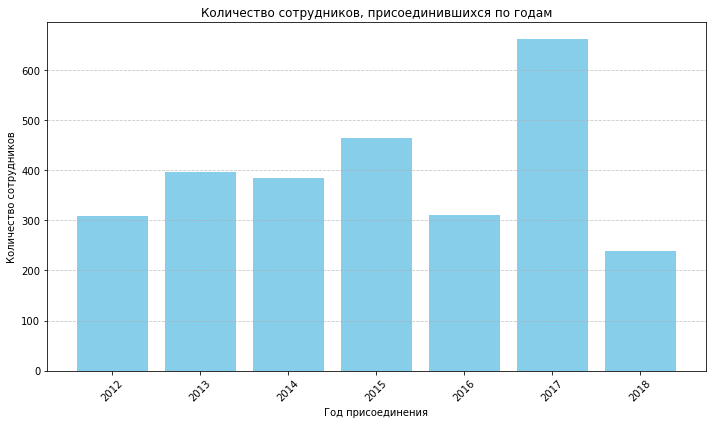

In [8]:
JoiningYear = employees_joining_by_year['JoiningYear']
EmployeesJoined = employees_joining_by_year['Employees Joined']

# Создание графика
plt.figure(figsize=(10, 6))
plt.bar(JoiningYear, EmployeesJoined, color='skyblue')
plt.xlabel('Год присоединения')
plt.ylabel('Количество сотрудников')
plt.title('Количество сотрудников, присоединившихся по годам')
plt.xticks(JoiningYear, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Отображение графика
plt.tight_layout()
plt.show()

Разделение по количеству присоединившихся мужчин и женщин

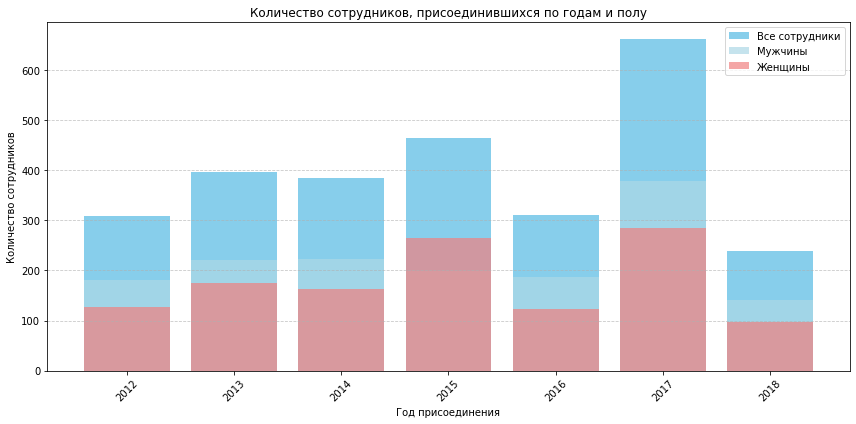

In [9]:
employees_joining_by_year = data.groupby(by='JoiningYear').size().reset_index(name='Employees Joined')

JoiningYear = employees_joining_by_year['JoiningYear']
EmployeesJoined = employees_joining_by_year['Employees Joined']

# Создание графика
plt.figure(figsize=(12, 6))
plt.bar(JoiningYear, EmployeesJoined, color='skyblue', label='Все сотрудники')

# Группировка данных по году и полу
gender_by_year = data.groupby(['JoiningYear', 'Gender']).size().unstack().fillna(0)

# График для мужчин
plt.bar(JoiningYear, gender_by_year['Male'], color='lightblue', label='Мужчины', alpha=0.7)

# График для женщин
plt.bar(JoiningYear, gender_by_year['Female'], color='lightcoral', label='Женщины', alpha=0.7)

# Настройка графика
plt.xlabel('Год присоединения')
plt.ylabel('Количество сотрудников')
plt.title('Количество сотрудников, присоединившихся по годам и полу')
plt.xticks(JoiningYear, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Отображение графика
plt.tight_layout()
plt.show()

#### Распределение по месту жительства

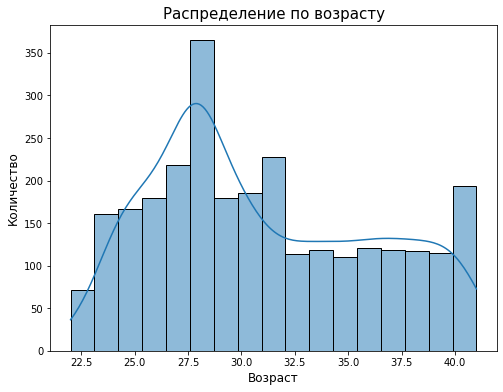

In [22]:
plt.figure(figsize=(8, 6))

sns.histplot(data['Age'], kde=True)

plt.title('Распределение по возрасту',fontsize=15)
plt.xlabel('Возраст',fontsize=12)
plt.ylabel('Количество',fontsize=12)

plt.show()

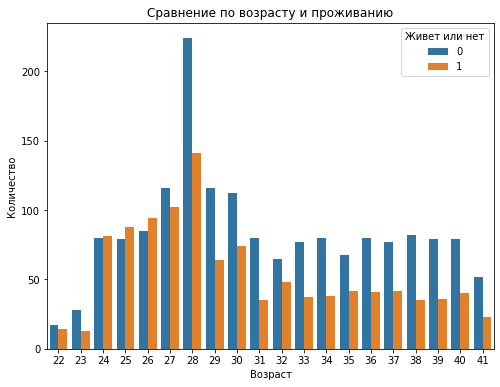

In [25]:
plt.figure(figsize=(8, 6))

sns.countplot(data = data, x = 'Age', hue = 'LeaveOrNot')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Сравнение по возрасту и проживанию')
plt.legend(title='Живет или нет')

plt.show()

In [26]:
employees_by_city = data.groupby(by = 'City').size().reset_index(name = 'total_employees')
employees_by_city['pct'] = round(100*(employees_by_city['total_employees'] / len(data)))
employees_by_city

,City,total_employees,pct
0,Bangalore,1171,42.0
1,New Delhi,792,29.0
2,Pune,801,29.0


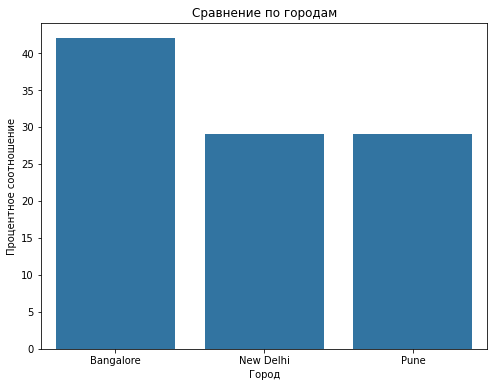

In [27]:
plt.figure(figsize=(8, 6))

sns.barplot(data = employees_by_city, x = 'City', y = 'pct')
plt.xlabel('Город')
plt.ylabel('Процентное соотношение')
plt.title('Сравнение по городам')

plt.show()

#### Распределение по возрасту

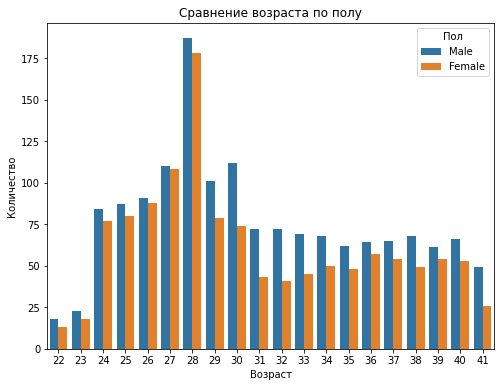

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Age', hue='Gender')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Сравнение возраста по полу')
plt.legend(title='Пол')

plt.show()

#### По наличию образования

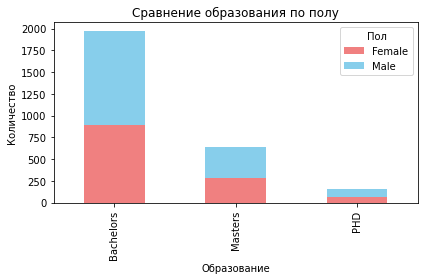

In [31]:
grouped_data = data.groupby(['Education', 'Gender']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue'])
plt.xlabel('Образование')
plt.ylabel('Количество')
plt.title('Сравнение образования по полу')
plt.legend(title='Пол', loc='upper right')
plt.tight_layout()
plt.show()

#### По опыту работы

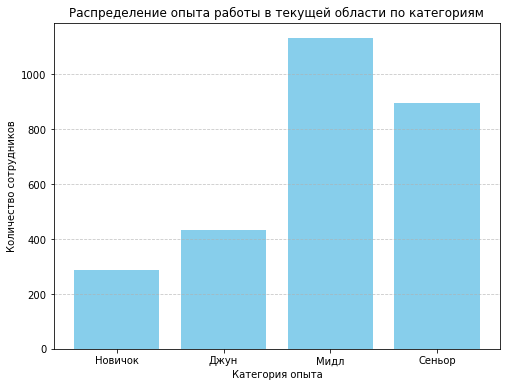

In [15]:
ExperienceInCurrentDomain = data['ExperienceInCurrentDomain']

# Определение порогов для категорий
thresholds = [0, 1, 3, 5]
category_labels = ['Новичок', 'Джун', 'Мидл', 'Сеньор']

# Создание словаря для подсчета количества сотрудников в каждой категории
category_counts = {label: 0 for label in category_labels}

# Определение категорий для каждого сотрудника
for experience in ExperienceInCurrentDomain:
    for i, threshold in enumerate(thresholds):
        if experience <= threshold:
            category_counts[category_labels[i]] += 1
            break

# Создание графика
plt.figure(figsize=(8, 6))
plt.bar(category_counts.keys(), category_counts.values(), color='skyblue')
plt.xlabel('Категория опыта')
plt.ylabel('Количество сотрудников')
plt.title('Распределение опыта работы в текущей области по категориям')

# Отображение графика
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

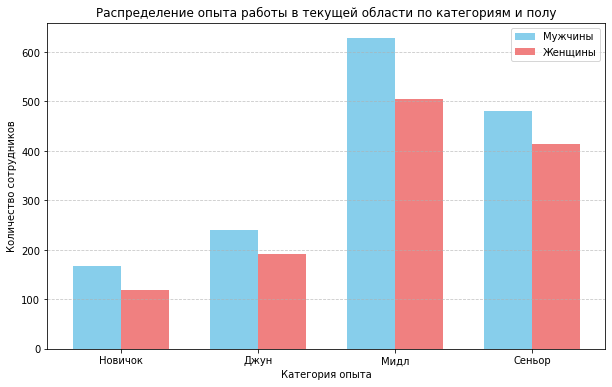

In [16]:
Gender = data['Gender']

# Определение порогов для категорий опыта
thresholds = [0, 1, 3, 5]
category_labels = ['Новичок', 'Джун', 'Мидл', 'Сеньор']

# Создание словаря для подсчета количества сотрудников в каждой категории
category_counts = {label: {gender: 0 for gender in data['Gender'].unique()} for label in category_labels}

# Определение категорий для каждого сотрудника
for experience, gender in zip(ExperienceInCurrentDomain, Gender):
    for i, threshold in enumerate(thresholds):
        if experience <= threshold:
            category_counts[category_labels[i]][gender] += 1
            break

# Создание графика
categories = category_counts.keys()
male_counts = [category_counts[category]['Male'] for category in categories]
female_counts = [category_counts[category]['Female'] for category in categories]

x = range(len(categories))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x, male_counts, width, label='Мужчины', color='skyblue')
plt.bar([i + width for i in x], female_counts, width, label='Женщины', color='lightcoral')

plt.xlabel('Категория опыта')
plt.ylabel('Количество сотрудников')
plt.title('Распределение опыта работы в текущей области по категориям и полу')

plt.xticks([i + width/2 for i in x], categories)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Зависимость от возраста

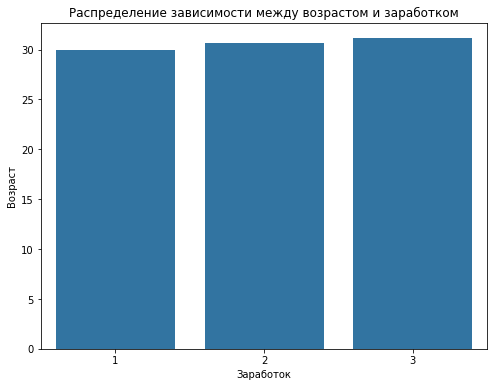

In [36]:
plt.figure(figsize=(8, 6))

sns.barplot(data=data, x='PaymentTier', y='Age',errorbar=None)

plt.title('Распределение зависимости между возрастом и заработком')
plt.xlabel('Заработок')
plt.ylabel('Возраст')

plt.show()

* Контрольные вопросы

    * Поясните особенности основных методов метрической классификации: метод ближайшего соседа, метод k ближайших соседей.
    
    *Метрическая классификация - это один из методов машинного обучения, который опирается на измерение сходства между объектами для принятия решений о принадлежности объекта к определенному классу. Два основных метода метрической классификации - это метод ближайшего соседа и метод k ближайших соседей.*
    
    *Метод ближайшего соседа (1NN):
        Основной принцип: Классификация объекта происходит путем определения ближайшего объекта из обучающей выборки к целевому объекту и присвоением целевому объекту класса этого ближайшего соседа.
        Особенности:
            Прост в реализации.
            Чувствителен к выбросам.
            Может давать плохие результаты, если обучающая выборка содержит шум.*

    *Метод k ближайших соседей (kNN):
        Основной принцип: Классификация объекта происходит путем определения k ближайших объектов из обучающей выборки к целевому объекту и применением механизма голосования для определения класса целевого объекта.
        Особенности:
            Параметр k позволяет учитывать несколько соседей, что делает метод более устойчивым к выбросам.
            Не требует предположений о распределении данных.
            Может потребовать подбора оптимального значения k.*
            
    * Поясните основные принципы и этапы реализации метода kNN.
    
    *1. Загрузка и предобработка данных.*
    
    *2. Определение метрики расстояния между объектами (например, евклидово расстояние или манхэттенское расстояние).
    Выбор значения k.*
    
    *3. Для каждого целевого объекта вычисление расстояний до всех объектов обучающей выборки.
    Сортировка объектов по расстоянию в порядке возрастания.*
    
    *4. Выбор k ближайших соседей.*
    
    *5. Применение голосования для определения класса целевого объекта.*
    
    * Поясните принцип выбора количества соседних объектов, по которым определяется принадлежность целевого объекта к результирующему классу.
    
    *Выбор количества соседних объектов (значение k) в методе kNN зависит от данных и задачи. Маленькое значение k может сделать классификацию более чувствительной к выбросам, в то время как большое значение k может сгладить разделяющие поверхности и сделать классификацию менее чувствительной к шуму. Обычно k выбирают путем кросс-валидации или других методов подбора, чтобы найти оптимальное значение для конкретной задачи.*
    
    * В чем заключается метод парзеновского окна?
    
    *Метод парзеновского окна - это один из вариантов метода kNN, где веса соседей распределены в соответствии с некоторой функцией ядра. Функция ядра определяет, как близкие соседи влияют на классификацию целевого объекта. Разные функции ядра могут использоваться для учета разной важности соседей.*
    
    * Назовите, какие параметры оптимизируют в методах kNN?
    
    *1. Значение k - оптимальное количество соседей.*
    
    *2. Метрика расстояния - выбор подходящей метрики (например, евклидово расстояние, манхэттенское расстояние).*
    
    *3. Функция ядра (если используется метод парзеновского окна) и параметры функции ядра.*
    
    *4. Предобработка данных - масштабирование, нормализация и удаление выбросов.*
    
    *5. Стратификация выборки - разделение данных на подгруппы для учета дисбаланса классов.*